# Hackathon 2

In the first exercise, you will develop a model for estimating the cooling/heating load indexes of a building from its characteristics. These indexes serve as reference to adapt the power of air conditioning systems. In the second exercise, you will forecast the hourly electric power consumption in Spain. Electricity being not storable, predicting the electric consumption is a crucial matter for energy producers. You will develop an autoregressive model for this purpose. 

## Report content

•	You have to fill in this  jupyter notebook downloadable on the moodle website of the course

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	The deadline for submission is reported on the moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.

## Names and Noma of participants:

Part. 1:

Part. 2:

Part. 3:

Part. 4:


## Regression

When designing a building, the computation of the heating load (HL) and the cooling load (CL) is required to determine the specifications of the heating and cooling equipment needed to maintain comfortable indoor air conditions. Architects and building designers need information about the characteristics of the building and of the conditioned space. For this reason, we  investigate the effect of eight input variables: (RC), surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution, to determine the output variables HL and CL of residential buildings.
The dataset contains eight attributes (or features) and two responses (or outcomes). The aim is to use the eight features to predict each of the two responses.

Features: RelativeCompactness, SurfaceArea ,WallArea, RoofArea, OverallHeight, Orientation, GlazingArea, GlazingAreaDistribution.

Prediction: HeatingLoad, CoolingLoad



In [1]:
# Import
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as sc

---
1) Report useful statistics for each variables (mean, std, heatmap of correlations,...)

Moyennes: 
Relative_Compactness: 0.7641666666666677
Surface_Area: 671.7083333333334
Wall_Area: 318.5
Roof_Area: 176.60416666666666
Overall_Height: 5.25
Orientation: 3.5
Glazing_Area: 0.23437500000000186
Glazing_Area_Distribution: 2.8125
Heating_Load: 22.307200520833305
Cooling_Load: 24.58776041666671



Déviations standards: 
Relative_Compactness: 0.10577747587475206
Surface_Area: 88.08611605586826
Wall_Area: 43.6264814379949
Roof_Area: 45.165950222920344
Overall_Height: 1.7511404367453496
Orientation: 1.1187625870603635
Glazing_Area: 0.13322056291470877
Glazing_Area_Distribution: 1.5509596642247505
Heating_Load: 10.090195732006162
Cooling_Load: 9.513305562326163





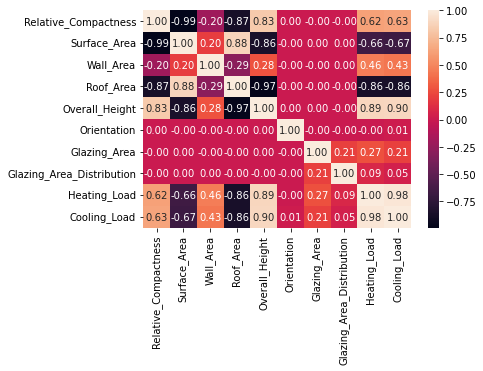

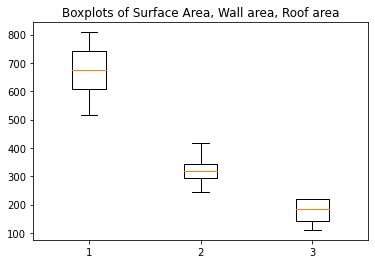

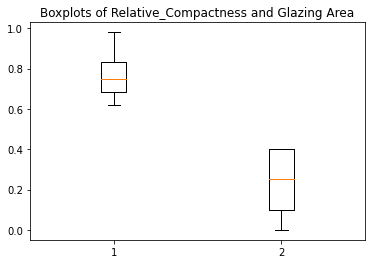

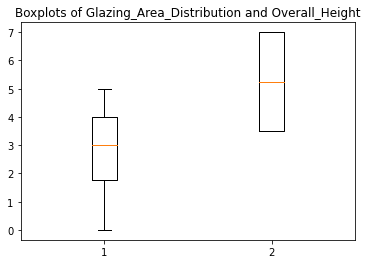

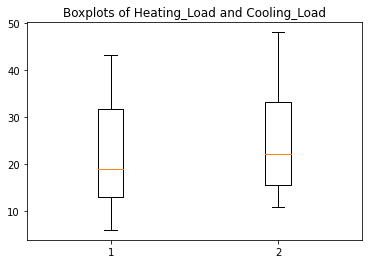

In [2]:
#code here
data = pd.read_csv("Data_heating_cooling.csv") 


moy= []

moy.append("Relative_Compactness: " + str(data["Relative_Compactness"].mean()))
moy.append("Surface_Area: " + str(data["Surface_Area"].mean()))
moy.append("Wall_Area: " + str(data["Wall_Area"].mean()))
moy.append("Roof_Area: " + str(data["Roof_Area"].mean()))
moy.append("Overall_Height: " + str(data["Overall_Height"].mean()))
moy.append("Orientation: " + str(data["Orientation"].mean()))
moy.append("Glazing_Area: " + str(data["Glazing_Area"].mean()))
moy.append("Glazing_Area_Distribution: " + str(data["Glazing_Area_Distribution"].mean()))
moy.append("Heating_Load: " + str(data["Heating_Load"].mean()))
moy.append("Cooling_Load: " + str(data["Cooling_Load"].mean()))


std = []
std.append("Relative_Compactness: " + str(data["Relative_Compactness"].std()))
std.append("Surface_Area: " + str(data["Surface_Area"].std()))
std.append("Wall_Area: " + str(data["Wall_Area"].std()))
std.append("Roof_Area: " + str(data["Roof_Area"].std()))
std.append("Overall_Height: " + str(data["Overall_Height"].std()))
std.append("Orientation: " + str(data["Orientation"].std()))
std.append("Glazing_Area: " + str(data["Glazing_Area"].std()))
std.append("Glazing_Area_Distribution: " + str(data["Glazing_Area_Distribution"].std()))
std.append("Heating_Load: " + str(data["Heating_Load"].std()))
std.append("Cooling_Load: " + str(data["Cooling_Load"].std()))

def printmoy(moyennes) : 
    print("Moyennes: ")
    for i in moyennes:
        print(i)
    print("\n\n")

def printstd(stand_dev) : 
    print("Déviations standards: ")
    for i in stand_dev:
        print(i)
    print("\n\n")

printmoy(moy)
printstd(std)
#heatmap
sns.heatmap(data.corr(), annot=True, fmt=".2f") 
#boxplots to have an idea of distribution
fig, ax = plt.subplots()
ax.boxplot([data["Surface_Area"],data["Wall_Area"],data["Roof_Area"]])
ax.set_title('Boxplots of Surface Area, Wall area, Roof area')
plt.show()
fig2, ax2 = plt.subplots()
ax2.boxplot([data["Relative_Compactness"],data["Glazing_Area"]])
ax2.set_title('Boxplots of Relative_Compactness and Glazing Area')
plt.show()
fig3, ax3 = plt.subplots()
ax3.boxplot([data["Glazing_Area_Distribution"],data["Overall_Height"] ])
ax3.set_title('Boxplots of Glazing_Area_Distribution and Overall_Height')
plt.show()
fig4, ax4 = plt.subplots()
ax4.boxplot([data["Heating_Load"],data["Cooling_Load"] ])
ax4.set_title('Boxplots of Heating_Load and Cooling_Load')
plt.show()
#it makes no sense to have a boxplot for orientation

Comments

---
2)	Add a constant term (intercept) and perform a linear regression of the variable CoolingLoad on all other explanatory variables. Use  the library statsmodels.

i. Report the F statistics and R2: interpret them. 

ii. Analyze the t-statistics and p-values of each coefficient of regression.

Are all coefficients significant at 95%? Use the library statsmodels.api. The function OLS accepts pandas dataframe (use .drop() to remove columns).


In [3]:
X = data.drop(["Cooling_Load","Heating_Load"],axis = 1)
Y = data["Cooling_Load"]
Xm = sm.add_constant(X)
results = sm.OLS(Y,Xm).fit()

print(results.params)
print(results.summary())

const                        97.245749
Relative_Compactness        -70.787707
Surface_Area                 -0.066090
Wall_Area                     0.022528
Roof_Area                    -0.044309
Overall_Height                4.283843
Orientation                   0.121510
Glazing_Area                 14.717068
Glazing_Area_Distribution     0.040697
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Cooling_Load   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     859.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:38:04   Log-Likelihood:                -1979.3
No. Observations:                 768   AIC:                             3975.
Df Residuals:                     760   BIC:                             4012.
Df

Comments

---
3)	Remove non-significant coefficients except the intercept (e.g. with  𝛼  5%) and run again the regression. What do you notice when you compare the R2, log-likelihood, AIC and BIC (the AIC and BIC are not explained in the course, search on internet for explanations)


In [4]:
Xm = Xm.drop(["Surface_Area","Wall_Area","Roof_Area","Glazing_Area_Distribution","Orientation"],axis=1 )
Y = data["Cooling_Load"]
Xm = sm.add_constant(Xm)
results = sm.OLS(Y,Xm).fit()

print(results.params)
print(results.summary())

const                   10.920539
Relative_Compactness   -30.607426
Overall_Height           6.396845
Glazing_Area            14.817971
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Cooling_Load   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1903.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:38:04   Log-Likelihood:                -1998.8
No. Observations:                 768   AIC:                             4006.
Df Residuals:                     764   BIC:                             4024.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      

Comments

## Auto-regressive model

In a paper released early 2019, forecasting in energy markets is identified as one of the highest leverage contribution areas of Machine/Deep Learning toward transitioning to a renewable based electrical infrastructure (see https://arxiv.org/abs/1906.05433).  The file “Data_energy_load.csv” contains 4 years of electrical consumption  for Spain in MW/h.  This was retrieved from ENTSOE a public portal for Transmission Service Operator (TSO) data.

File format:

Date: dd-mm-yy, Hour : from 0 to 23. Weekday: from 1 (Monday)  to 7 (Sunday). Load: consumption in MW/h. Lm1: consumption 1h ago, Lm2: consumption 2h ago,… Lm14: consumption 14h ago

1)	Load the dataset and convert dates in datetime format (you can use the package datetime). Plot the time series of consumption, what do you observe?

       Date  Hour  Weekday     Load      Lm1      Lm2      Lm3      Lm4  \
0  02-01-15     0        6  27070.0  26798.0  29031.0  29571.0  29014.0   
1  02-01-15     1        6  24935.0  27070.0  26798.0  29031.0  29571.0   
2  02-01-15     2        6  23214.0  24935.0  27070.0  26798.0  29031.0   
3  02-01-15     3        6  22540.0  23214.0  24935.0  27070.0  26798.0   
4  02-01-15     4        6  22096.0  22540.0  23214.0  24935.0  27070.0   

       Lm5      Lm6      Lm7      Lm8      Lm9     Lm10     Lm11     LM12  \
0  28020.0  26447.0  23606.0  23118.0  23528.0  24672.0  24713.0  24133.0   
1  29014.0  28020.0  26447.0  23606.0  23118.0  23528.0  24672.0  24713.0   
2  29571.0  29014.0  28020.0  26447.0  23606.0  23118.0  23528.0  24672.0   
3  29031.0  29571.0  29014.0  28020.0  26447.0  23606.0  23118.0  23528.0   
4  26798.0  29031.0  29571.0  29014.0  28020.0  26447.0  23606.0  23118.0   

      LM13     LM14            Datetime  
0  23547.0  22250.0 2015-01-02 00:00:00  
1 

array([<AxesSubplot:xlabel='Datetime'>], dtype=object)

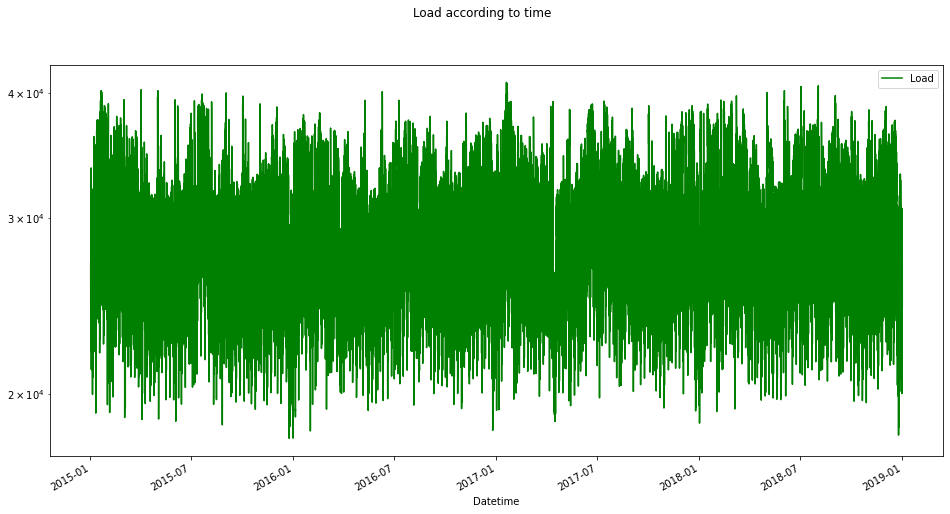

In [5]:
data_energy_load = pd.read_csv('Data_energy_load.csv', sep=';')

def date_to_datetime_object(data):
    newDatetime = np.array(data['Date'])
    for i in range(len(data['Date'])):
        tmp_date = data['Date'][i].split('-')
        tmp_time = int(data['Hour'][i])
        
        newDatetime[i] = dt.datetime(day=int(tmp_date[0]), month=int(tmp_date[1]), year=2000+int(tmp_date[2]), hour=tmp_time)
    data['Datetime'] = newDatetime
    
date_to_datetime_object(data_energy_load)

print(data_energy_load.head())
    
data_energy_load.plot(subplots=True, x='Datetime', y='Load', title="Load according to time", logy=True, color="green", figsize=(16,8))

Comments

The plot of the series of consumptions uses a really big amount of data. So, it is normal to observe a lot of oscillations to have a plot that is not very clear to understand or analyse. Thus, it is interesting to work with regressions and to try to analyse different aspects (consumtion per day/week/hour).


---
2) We will regress the electric consumption (‘Load’) on the following covariates ‘Weekday’, ‘Hour’, ‘Lm1’, ‘Lm2’,…,’Lm14’. Plot the following graphs:

•	Average electric consumption per day (y axis) versus weekday (x axis)

•	Average electric consumption per hour(y axis) versus hour (x axis)

Based on these graphs, do you think that it is a good idea to regress linearly the consumption on variables ‘Hour’ and ‘Weekday’? 


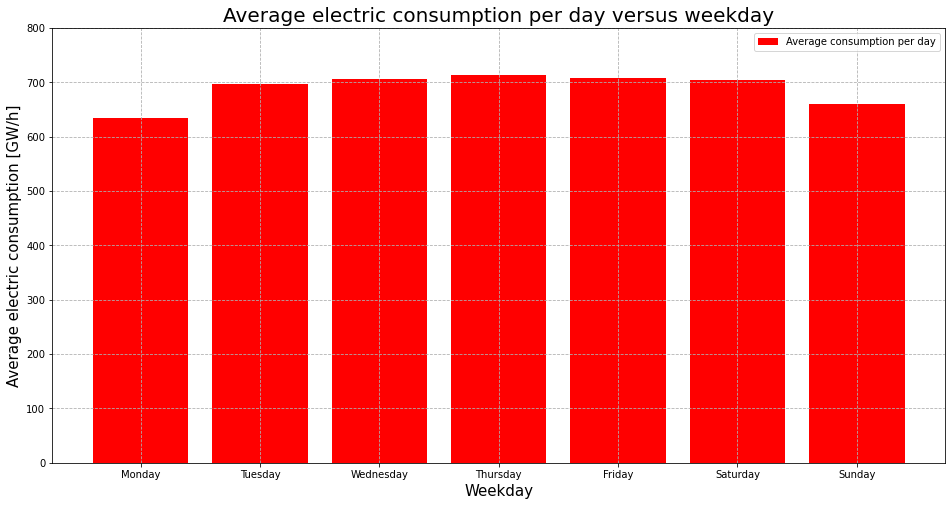

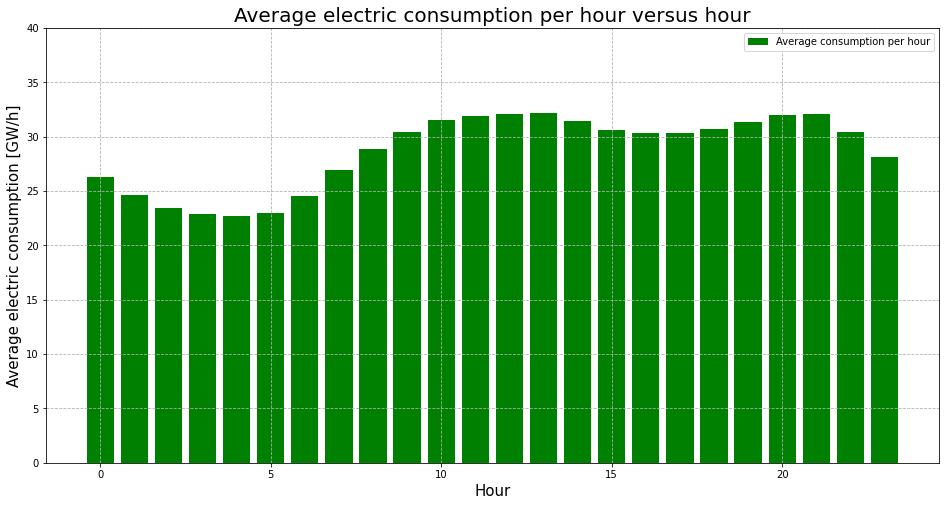

In [6]:
def av_wd(data: pd.DataFrame):
    # Calculate sum of load for each day
    sum_per_day = data.filter(items=['Date', 'Load', 'Weekday']).groupby(['Date']).sum()
    average_weekday = np.zeros(7)
    # Calculate average load for each day of the week
    for i in range(7):
        average_weekday[i] = sum_per_day[sum_per_day["Weekday"] == 24*(i+1)].filter(items=['Load']).mean()
    return average_weekday
def plt_wd(arr):
    x = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    plt.figure(figsize=(16,8))
    plt.grid(linestyle='--')
    
    plt.bar(x,arr/1_000,color='r', label="Average consumption per day")
    
    plt.title("Average electric consumption per day versus weekday",fontsize=20)
    plt.xlabel("Weekday",fontsize=15)
    plt.ylabel("Average electric consumption [GW/h]",fontsize=15)
    plt.legend()
    plt.ylim(top=800)
    plt.show()

def av_h(data):
    average_hour = np.zeros(24)
    for i in range(24):
        average_hour[i] = data[data["Hour"] == i].filter(items=["Load"]).mean()
    return average_hour

def plt_h(arr):
    x = np.arange(0,24,1)
    plt.figure(figsize=(16,8))
    plt.grid(linestyle='--')
    
    plt.bar(x,arr/1_000,color='g',linewidth=4, label="Average consumption per hour")
    
    plt.title("Average electric consumption per hour versus hour",fontsize=20)
    plt.xlabel("Hour",fontsize=15)
    plt.ylabel("Average electric consumption [GW/h]",fontsize=15)
    plt.legend()
    plt.ylim(top=40)
    plt.show()

average_weekday = av_wd(data_energy_load)
average_hour = av_h(data_energy_load)
plt_wd(average_weekday)
plt_h(average_hour)

Comments

Observing the first plot, we can see that it can be good to regress linearly because, apart from the limit values, the other ones have a good linear shape. 

For the second graph, it might be a slightly less better idea because we have more oscillations that are more curved but it is not catastrophic either, because a linear regression can still be fairly good. 

---
3) We will slightly transform the dataset. We first add a constant column for the regression (column of ones). You also convert the variable ‘Hour’ into 23 (and not 24!) binary variables H1,…H23. You next convert the variable ‘Weekday’ into 6 (and not 7) variables W2,…,W7. Use the command get_dummies(.) from pandas. Why do we remove H0 and W1? Why do we do this conversion?

---

In [7]:
#Add a column for the constant
data_energy_load['Constant']=1

#Add a column for each hour of the day
data_energy_load= pd.get_dummies(data_energy_load, prefix="H",columns=['Hour'],drop_first=True)

#Add a column for each weekday
data_energy_load= pd.get_dummies(data_energy_load, prefix='W', columns=['Weekday'],drop_first=True)

We drop the first columns to keep k-1 dummies (k=24 for the 'Hours' columns and k=7 for the 'Weekday' columns). Indeed, we have a redundancy of one level. When every dummy column is 0, it means that the first value is 1 (H_0=1 or W1=1).

Comments

---
4) Split the dataset in

•	a training set with observations from 02-01-15 up to 01-12-2018 (included)

•	a test (or validation) set with observations from 02-12-2018 up to 31-12-2018.


In [8]:
# Set the index
data_energy_load=data_energy_load.set_index(data_energy_load['Datetime'])
# Sort the index
data_energy_load=data_energy_load.sort_index()

training_data = data_energy_load['2015-01-02':'2018-12-01']
testing_data = data_energy_load['2018-12-02':'2018-12-31']

---
If we denote by L(t) the consumption at time t, the model that we want to develop is 
$$L(t) = cst + \sum_{k=1}^{14} a_k L(t-k) +\sum_{k=2}^{7} b_k W_k + \sum_{k=1}^{23} c_k H_k    $$

o	Estimate this model with statsmodels on the training set. 

o	How would you judge the quality of the predictive model?

o	Compute the Mean Absolute Error (MAE) between predicted and real consumptions.



In [14]:
# Colunms we take
colunms_OLS = ['H_1', 'H_2', 'H_3', 'H_4', 'H_5', 'H_6', 'H_7', 'H_8', 'H_9', 'H_10', 'H_11', 'H_12', 'H_13', 'H_14', 'H_15', 'H_16', 'H_17', 'H_18', 'H_19', 'H_20', 'H_21', 'H_22', 'H_23', 'W_2', 'W_3', 'W_4', 'W_5', 'W_6', 'W_7', 'Lm1', 'Lm2', 'Lm3', 'Lm4', 'Lm5', 'Lm6', 'Lm7', 'Lm8', 'Lm9', 'Lm10', 'Lm11', 'LM12', 'LM13', 'LM14', 'Constant']
Xm = sm.add_constant(training_data[colunms_OLS])

# Create a model using OLS
model = sm.OLS(training_data["Load"], Xm)
# Fit the model
results = model.fit()
# Print the summary output
print(results.summary())

estimated_tr_val = results.predict(sm.add_constant(training_data[colunms_OLS]))

def mae(y_true, predictions):
    return np.mean(np.abs(y_true - predictions))

print("==============================================================================")
print("MAE on training set : " + str(np.round(mae(training_data['Load'], estimated_tr_val), 3))+ " [MW/h]")
print("==============================================================================")

                            OLS Regression Results                            
Dep. Variable:                   Load   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 3.296e+04
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:05:35   Log-Likelihood:            -2.7363e+05
No. Observations:               34320   AIC:                         5.473e+05
Df Residuals:                   34276   BIC:                         5.477e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
H_1         -180.3130     28.417     -6.345      0.0

Comments

To evaluate the quality of our model, we will look at the MAE which is considered like the error between our estimated values and our real values. With an MAE of 444.52 MWh we can see that it is considerably smaller than the values we are working with. So it is a fairly small error and we can say that the prediction is of fairly good quality. 

5) Use this model on the test set to forecast the electric consumption.

o	Compare on a graph, the forecast to  real consumptions on the given period. Plot also the errors of prediction.

o	Compute the MAE on the test set and the R2. Is the forecast reliable?

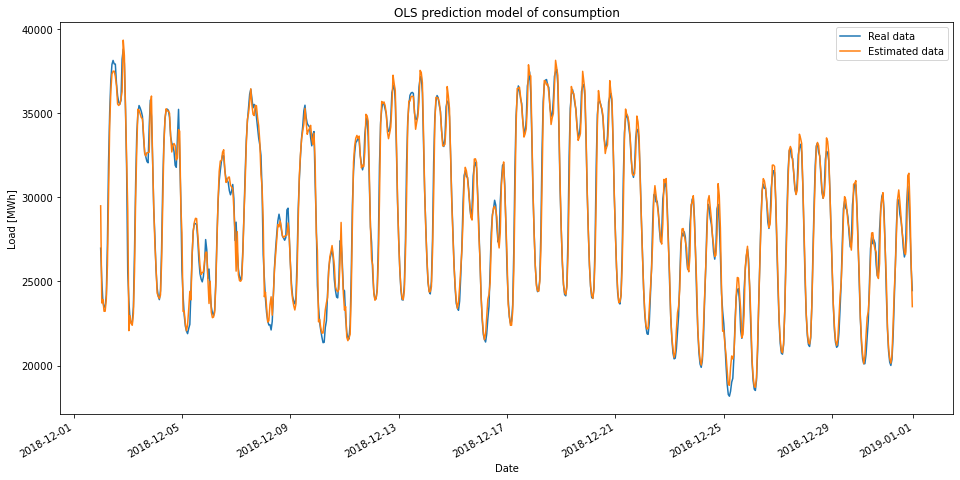

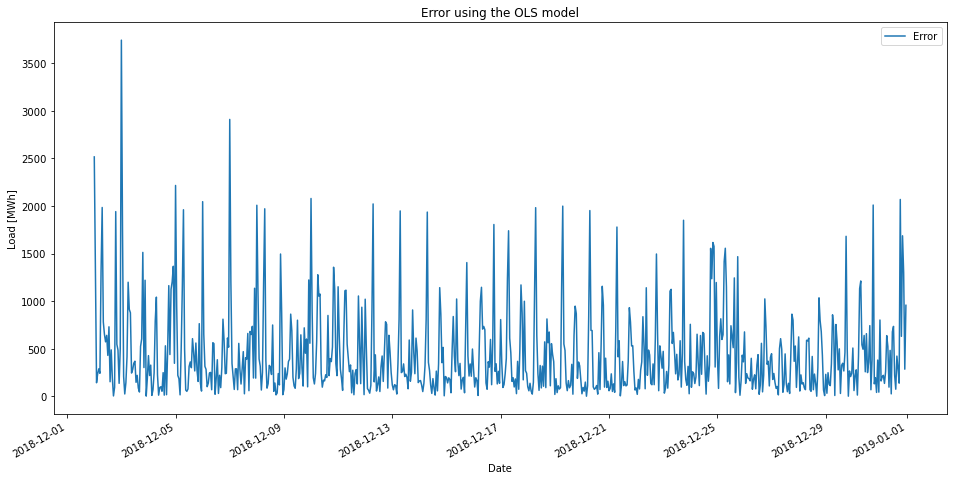

MAE on test set : 444.823 [MW/h]
R2 :  0.9763851404405341


In [13]:
# Plot the testing data with the model
plt.figure(figsize=(16,8))
plt.title('Testing values estimated with OLS model')

plt.plot(testing_data['Datetime'], testing_data['Load'], label="Real data")
plt.gcf().autofmt_xdate()

estimated_test_val = results.predict(sm.add_constant(testing_data[colunms_OLS]))
R2 = results.rsquared

plt.plot(testing_data['Datetime'], estimated_test_val, label="Estimated data")

plt.title("OLS prediction model of consumption")
plt.xlabel("Date")
plt.ylabel("Load [MWh]")
plt.legend()
plt.show()

plt.figure(figsize=(16,8))
plt.title('Error using the OLS model')

plt.plot(testing_data['Datetime'], abs(testing_data['Load'] - estimated_test_val), label="Error")
plt.gcf().autofmt_xdate()

plt.xlabel("Date")
plt.ylabel("Load [MWh]")
plt.legend()
plt.show()


print("==============================================================================")
print("MAE on test set : " + str(np.round(mae(testing_data['Load'], estimated_test_val), 3))+ " [MW/h]")
print("R2 : ",R2)
print("==============================================================================")

Comments

We can see that the MAE value is extremely close to the one in the previous question, so the same interpretation can be done, and we can say that it is a fairly good model. 

Moreover, we see the value of $R^2$=0.9764 is really close to 1. So the accuracy of the model is really high.

6) We want to check that the average consumption at 11h is significantly different (at 95%) from the average consumption at 13h. Perform a statistical test (explain which stat you use) and report the stat value, the pivot value(s) and the p-value.

In [11]:
av_11 = data_energy_load[data_energy_load['H_11'] == 1].filter(items=['Load'])['Load']
av_13 = data_energy_load[data_energy_load['H_13'] == 1].filter(items=['Load'])['Load']
n11=len(av_11)
n13=len(av_13)

# We conduct a two-sample T-test
t_stat, pvalue = sc.ttest_ind(av_11,av_13)

# we compute the pivot values for the 95% confidence interval
alpha = 0.05                                     #alpha = 1 - 0.095
t_low = sc.t.ppf(q=alpha/2,df=(n11-1)+(n13-1))    #Lower bound
t_up = sc.t.ppf(q=1-alpha/2,df=(n11-1)+(n13-1))   #Upper bound

# v11=np.var(av_11)
# v13=np.var(av_13)
print("==============================================================================")
print("According to the Two-Sample T-test we find :")
print("- T-Stat Value = ", t_stat)
print("- P-value = ", pvalue)
print("- Confidence interval = [{}, {}] ".format(t_low,t_up))
print("==============================================================================")

According to the Two-Sample T-test we find :
- T-Stat Value =  -2.168621421518421
- P-value =  0.030191973812613414
- Confidence interval = [-1.9607772946161888, 1.9607772946161883] 


Comments

We assume that :
- our two samples (loads at 11H and at 13h) are independent
- the data elements of the samples follow a normal distribution
- the null hypothesis that their average values are identical is true.

We conduct a Two-Sample T-test on the list of loads at 11h and at 13h. In order to show that they are signicantly different at 95%, we check that the pvalue is less than alpha, which is verified because 0.03 < 0.05.

7) The test of question 5 requires that variances are equal. Test if this assumption holds (95% confidence level). Report  the stat value, the pivot value (s).

In [17]:
# Sample variance 
var1 = np.std(av_11, ddof=1) 
var2 = np.std(av_13, ddof=1)

#Test T values 
F= var1**2/var2**2

#F distribution, we find the pivot values 
alpha= 0.05 #because confidence level is 95%
F_l= sc.f.ppf(q=alpha/2,dfn=n11-1, dfd=n11-1)
F_u= sc.f.ppf(q=1-alpha/2,dfn=n11-1, dfd=n11-1)

pval=2*(1-sc.f.cdf(np.abs(T), dfn=n11-1 , dfd=n11-1))

print("==============================================================================")
print("According to the Two-Sample Fisher's test we find :")
print("- F-Stat Value = ", F)
print("- P-value = ", pvalue)
print("- Pivot values are: {} and {}".format(F_l, F_u))
print("- Confidence interval = [{}, {}] ".format(F_l, F_u))
print("==============================================================================")

According to the Two-Sample Fisher's test we find :
- F-Stat Value =  1.0327018579534892
- P-value =  0.030191973812613414
- Pivot values are: 0.9024297172542847 and 1.1081195364915295
- Confidence interval = [0.9024297172542847, 1.1081195364915295] 


Comments